# Data Description
This dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

# Research Questions
Are we able to determine a students performance index from other key variables such as their study history, sleep, and hours of study?

# Importing The Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Importing the Data

In [2]:
data = pd.read_csv("Student_Performance.csv")

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


# Visualisation of the Data

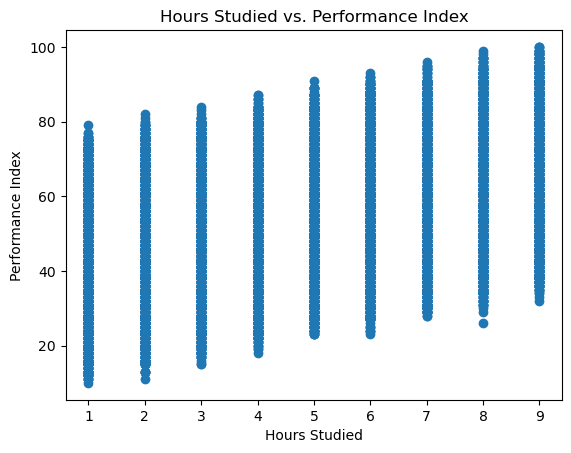

In [6]:
plt.scatter(data['Hours Studied'], data['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs. Performance Index')
plt.show()

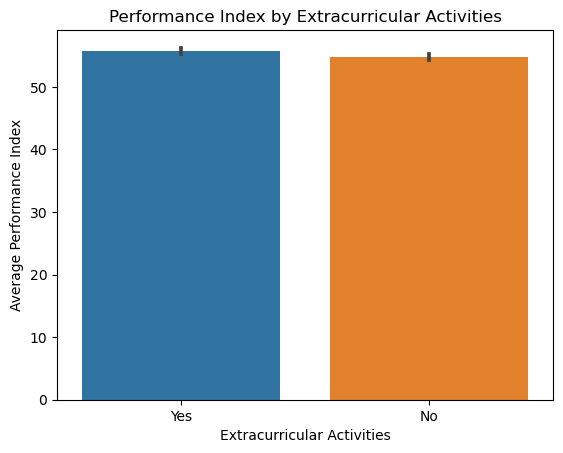

In [7]:
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=data)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Performance Index')
plt.title('Performance Index by Extracurricular Activities')
plt.show()

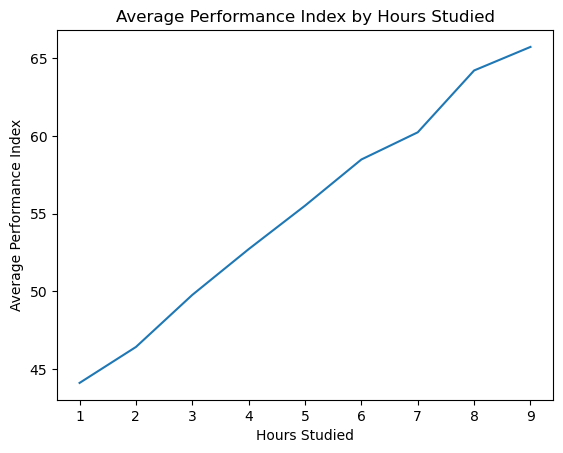

In [8]:
avg_performance_by_hours = data.groupby('Hours Studied')['Performance Index'].mean()
plt.plot(avg_performance_by_hours.index, avg_performance_by_hours.values)
plt.xlabel('Hours Studied')
plt.ylabel('Average Performance Index')
plt.title('Average Performance Index by Hours Studied')
plt.show()

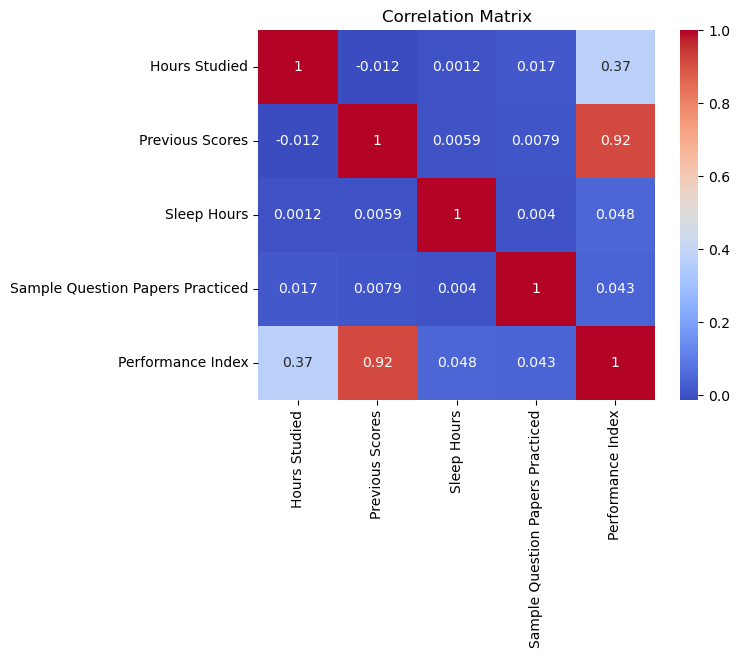

In [9]:
correlation_matrix = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

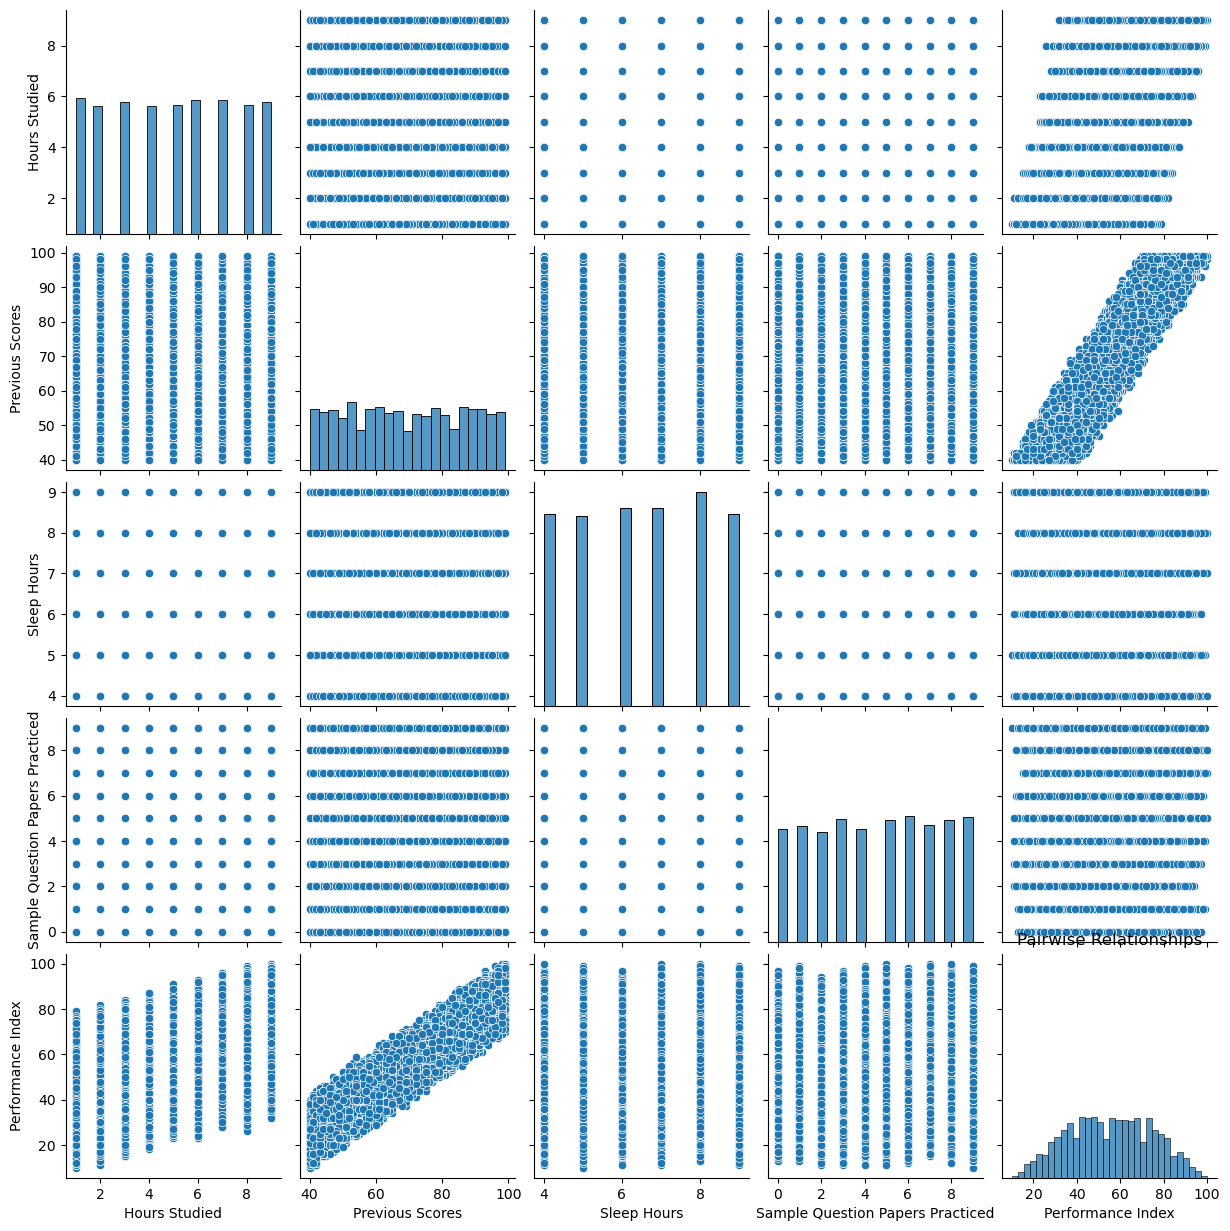

In [10]:
sns.pairplot(data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']])
plt.title('Pairwise Relationships')
plt.show()

# Linear Regression
## Training the Data 

In [11]:
# Splitting data into IV and DV
X = data.drop("Performance Index", axis=1)
y = data["Performance Index"]

In [12]:
# Splitting data into Train and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Label Encoding the Categorical Column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_train["Extracurricular Activities"] = encoder.fit_transform(X_train["Extracurricular Activities"])
X_test["Extracurricular Activities"] = encoder.transform(X_test["Extracurricular Activities"])

In [14]:
# Training a Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Evaluating Results

In [15]:
# Predicting Test Set Results
y_pred = regressor.predict(X_test)
y_pred = np.round_(y_pred, decimals = 2)

In [16]:
# Real Values vs Predicted Values
pd.DataFrame({'Actual Performance': y_test, 'Predicted Performance': y_pred})

,Actual Performance,Predicted Performance
6252,51.0,54.71
4684,20.0,22.62
1731,46.0,47.90
4742,28.0,31.29
4521,41.0,43.00
...,...,...
6412,45.0,46.89
8285,66.0,62.70
7853,16.0,16.79
1095,65.0,63.34


In [17]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mean_er = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : ', mean_er)
print('R Square : ', r2)
print(regressor.coef_)
print(regressor.intercept_)

Mean Squared Error :  4.0826094
R Square :  0.9889833422235986
[2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
-33.921946215556424


Therefore, the equation of our multiple linear regression model is:

Student Performance = 2.85×Hours Studied + 1.02×Previous Scores + 0.61×Extracurricular Activities + 0.48×Sleep Hours + 0.19×Sample Question Papers Practiced - 33.92

### Analysing the Results
MSE indicates the average squared difference between the actual and predicted values. It provides a direct measure of how well our model's predictions match the actual values.

- The smaller the MSE, the closer the predictions are to the actual values, which indicates better accuracy.
- An MSE of 4.0826094 means that, on average, the model's predictions are off by a value of roughly sqrt(4.0826094) which is approximately 2.02 units (given the squared nature of the MSE) from the actual values.
- Given that our Performance Index ranges from 10 to 100, being off by approximately 2.02 units on average can be seen as reasonably accurate.

R2 represents the proportion of the variance in the dependent variable that can be predicted from the independent variables.

- An R2 value of 1 means that the model's predictions perfectly fit the data, while a value of 0 indicates that the model does not fit the data at all
- Your R2 value of 98.9% suggests that your model explains approximately 98.9% of the variability in the Performance Index. This is a very high value, indicating that the model's predictions are quite accurate in capturing the variability present in the actual data.
- An R2 value of 98.9% can be considered extremely good, and it would suggest a high degree of accuracy.

# Clustering

We are now applying the kMeans clustering method to this data. First, we will make a new dataframe of all the numerical values then apply the kMeans clustering function to the data.

In [18]:
# New df for numerical data
data_num = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Performance Index']]

In [19]:
km = KMeans(n_clusters = 4)
km.fit(data_num)

KMeans(n_clusters=4)

In [20]:
data_num['label'] = km.predict(data_num)

In [21]:
data_num.head()

,Hours Studied,Previous Scores,Sleep Hours,Performance Index,label
0,7,99,9,91.0,3
1,4,82,4,65.0,0
2,8,51,7,45.0,2
3,5,52,5,36.0,1
4,7,75,8,66.0,0


In [22]:
#find the mean
data_num.groupby(['label']).agg('mean')

,Hours Studied,Previous Scores,Sleep Hours,Performance Index
label,,,,
0,4.856084,77.428627,6.565913,62.984009
1,4.243976,47.150172,6.450516,30.138124
2,5.137803,61.097952,6.520298,47.181378
3,5.694273,91.596621,6.581376,79.948084


Text(0.5, 1.0, 'Performance Index by Hours Studied')

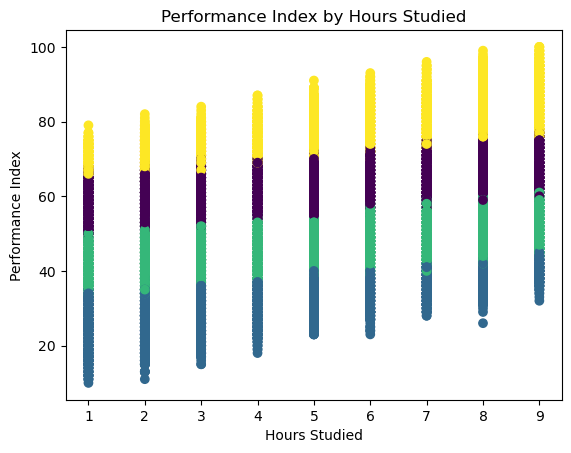

In [23]:
plt.scatter(x = data_num['Hours Studied'], y = data_num['Performance Index'],c = data_num['label'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Performance Index by Hours Studied')

Overall, as the hours of study increase, there is an upward movement in the performance index, suggesting that more hours of study generally correlate with better performance. However, the clusters make it clear that there are nuances in this trend.

Some overlapping occurs between clusters, particularly between the green and purple clusters. This could be attributed to the fact that the number of hours studied isn't the only determining factor for performance, and there might be other underlying factors or qualities influencing results.

Clustering: The data points are grouped into four distinct clusters based on their color:

- Blue Cluster: Represents individuals who have lower hours of study and fall into the lower performance index range.
- Green Cluster: Represents individuals with a mid-range of hours studied, corresponding to a mid-range performance index.
- Purple Cluster: Individuals with slightly higher hours of study and a higher performance index, but not the maximum.
- Yellow Cluster: Denotes individuals who have studied the most hours and tend to achieve the highest performance index.

Text(0.5, 1.0, 'Performance Index by Previous Scores')

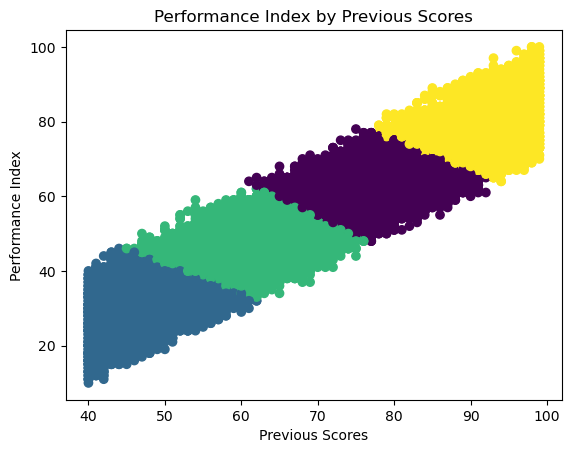

In [25]:
plt.scatter(x = data_num['Previous Scores'], y = data_num['Performance Index'],c = data_num['label'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Performance Index by Previous Scores')

A positive correlation can be observed. As the previous scores increase, the performance index also tends to increase. This suggests that individuals who performed well previously are likely to have a high performance index in the current assessment.

Within each cluster, there's still some variability in performance. For example, in the purple cluster, individuals with a previous score around 70 can have a performance index anywhere from 40 to 80. This indicates that while previous scores are indicative, they are not the sole determinants of the current performance index.

The data points are grouped into four distinct clusters based on their colour:
- Blue Cluster: Represents individuals with lower previous scores and lower performance indexes.
- Green Cluster: Denotes individuals with moderate previous scores and a mid-range performance index.
- Purple Cluster: Captures individuals with higher previous scores but not the highest, with a correspondingly higher performance index.
- Yellow Cluster: Signifies those with the highest previous scores and the highest performance indexes.

The clusters don't have significant outliers. This suggests that the clustering algorithm has done a good job in grouping individuals based on their scores.